# Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Loading the dataset

In [64]:
data = pd.read_csv('State_wise_Health_income.csv')

In [65]:
data.head()

ID       States  Health_indeces1  Health_indices2  Per_capita_income    GDP
0   0      Bachevo              417               66                564   1823
1   1  Balgarchevo             1485              646               2710  73662
2   2    Belasitsa              654              299               1104  27318
3   3    Belo_Pole              192               25                573    250
4   4       Beslen               43                8                528     22

In [66]:
data.isnull().sum()

ID                   0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [67]:
data.describe()

ID  Health_indeces1  Health_indices2  Per_capita_income   
count  297.000000       297.000000       297.000000         297.000000  \
mean   148.000000      2630.151515       693.632997        2156.915825   
std     85.880731      2038.505431       468.944354        1491.854058   
min      0.000000       -10.000000         0.000000         500.000000   
25%     74.000000       641.000000       175.000000         751.000000   
50%    148.000000      2451.000000       810.000000        1865.000000   
75%    222.000000      4094.000000      1073.000000        3137.000000   
max    296.000000     10219.000000      1508.000000        7049.000000   

                 GDP  
count     297.000000  
mean   174601.117845  
std    167167.992863  
min        22.000000  
25%      8721.000000  
50%    137173.000000  
75%    313092.000000  
max    728575.000000

In [68]:
data.shape

(297, 6)

# Clustering and Scaling

In [71]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Health_indeces1', 'Health_indices2', 'Per_capita_income', 'GDP']])

# Hierarchical Clustering

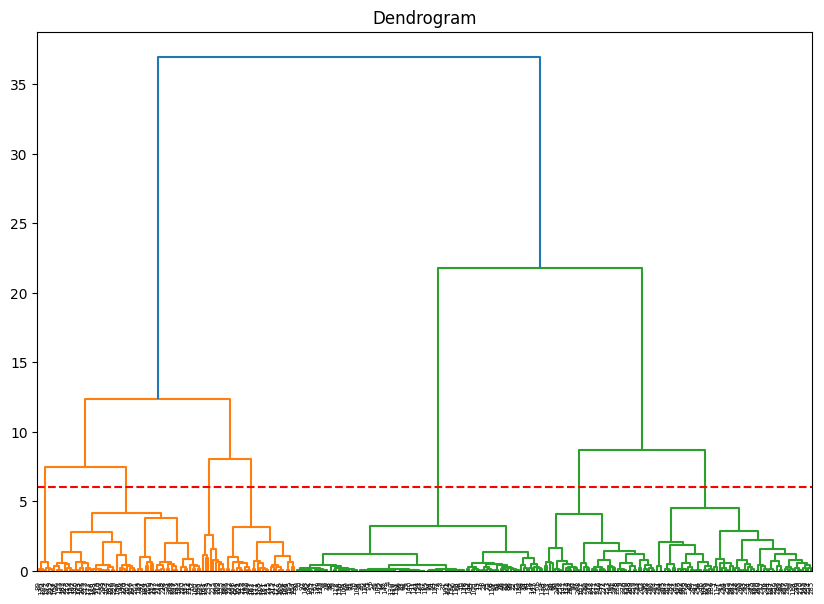

In [72]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
linkage_method = linkage(scaled_features, method='ward')
dendrogram(linkage_method)
plt.axhline(y=6, color='r', linestyle='--') 
plt.show()

# K-Means Clustering

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

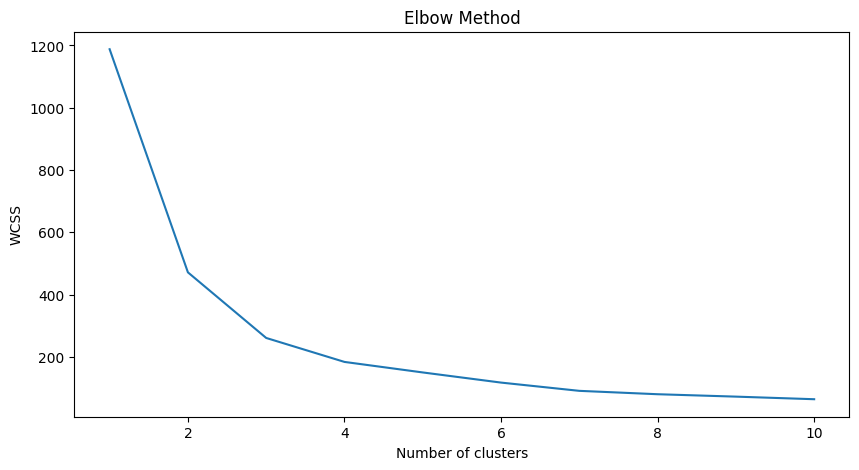

In [101]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Elbow Curve and Silhouette Score

In [102]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.53


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Clustering based on Cluster Column

In [103]:
data['Cluster'] = cluster_labels

In [104]:
data.head(100)

ID         States  Health_indeces1  Health_indices2  Per_capita_income   
0    0        Bachevo              417               66                564  \
1    1    Balgarchevo             1485              646               2710   
2    2      Belasitsa              654              299               1104   
3    3      Belo_Pole              192               25                573   
4    4         Beslen               43                8                528   
..  ..            ...              ...              ...                ...   
95  95    Ballykinler              801              204                596   
96  96    Ballylesson             2893              664               1474   
97  97    Ballylinney              533              102                625   
98  98  Ballymacmaine             1412              443               1376   
99  99    Ballymacnab             2120              475               1367   

       GDP  Cluster  
0     1823        2  
1    73662        4  
2    27318        2  
3      250        2  
4       22        2  
..     ...      ...  
95   10308        2  
96  129285        1  
97    4042        2  
98   43048        1  
99   78138        1  

[100 rows x 7 columns]

In [105]:
cluster_profiles = cluster_data.groupby('Cluster')

In [106]:
print(cluster_profiles)